In [3]:
# Importing the necessary libraries
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt

# Importing standard Qiskit libraries
from qiskit import *
from qiskit.quantum_info import Statevector
from qiskit.tools.jupyter import *
from qiskit.visualization import *

$$
U_{\vec{\phi}} = e^{i \phi_0 Z} \prod_{k=1}^d W(a) e^{i \phi_k Z}
=
\begin{bmatrix}
P(a) & i Q(a) \sqrt{1-a^1} \\
i Q^{*}(a) \sqrt{1-a^2} & P^{*}(a)
\end{bmatrix}
$$

In [4]:
def QSP(phi_vec, a):
    nqubits = 1
    q = QuantumRegister(nqubits, 'q')
    circuit = QuantumCircuit(q)

    circuit.rz(-2*phi_vec[0], q)
    for k in range(1, len(phi_vec)):
        theta = -2*np.arccos(a)
        circuit.rx(theta, q)
        circuit.rz(-2*phi_vec[k], q)
    circuit.measure_all()
    return circuit

## Trivial Example
$ \vec{\phi} = (0,0) $

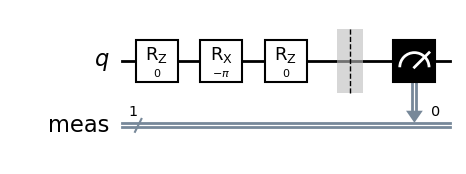

In [5]:
phi_vec_triv = [0, 0]

theta_vec_triv = np.arange(start=-np.pi, stop=np.pi, step=0.1)
a_vec_triv = [np.cos(-1/2*theta) for theta in theta_vec_triv]

qc = QSP(phi_vec_triv, 0)
qc.draw('mpl', style="bw")

## Example BB1
$ \vec{\phi} = (\pi/2, -\eta, 2\eta, 0, -2\eta, \eta) $ with $ \eta = \frac{1}{2} \cos^{-1}(-1/4) $

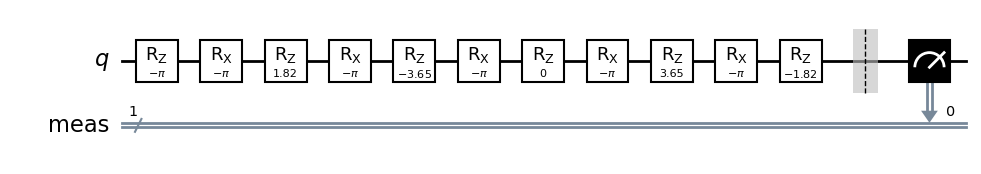

In [7]:
eta = 1/2 * np.arccos(-1/4)
phi_vec_bb1 = [np.pi/2, -eta, 2*eta, 0, -2*eta, eta]

qc = QSP(phi_vec_bb1, 0)
qc.draw('mpl', style="bw")